# Worksheet 10

Name: Jiahang Li 
UID: U00295086

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes, this is an example of classification because the model is predicting a binary outcome (whether the student will be offered a job or not) based on a single feature (GPA).
2. No, this is not an example of classification because the model is predicting a continuous variable (number of months) rather than a binary outcome.
3. Yes, this is an example of classification because the model is predicting a discrete variable (number of stars) based on a text input (description of the review).
4. No, this is not an example of classification because the model is predicting a count (number of births) rather than a binary or discrete outcome.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Split the dataset into a training set and a test set. 

Train the model on the training set using a suitable machine learning algorithm and hyperparameters.

Evaluate the performance of the model on the test set. 

If the model's performance on the test set is satisfactory, we can consider the model to be generalizing well to unseen data. If not, we may need to adjust the model's hyperparameters or try a different algorithm.

Optionally, we can further improve the model's performance by using cross-validation, which involves splitting the dataset into multiple folds and training the model on each fold while evaluating its performance on the remaining folds.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting occurs when a model is too simple to capture the underlying patterns in the data, and as a result, it performs poorly on both the training and test data. This means that the model is not learning enough from the training data and is not able to generalize well to new, unseen data.

Overfitting occurs when a model is too complex and captures not only the underlying patterns in the data but also the noise or random fluctuations in the data. This means that the model performs very well on the training data but poorly on the test data. In other words, the model is memorizing the training data instead of learning from it, and as a result, it is not able to generalize well to new, unseen data.

Signs of Underfitting:
Low accuracy or poor performance on both the training and test data.
The model is too simple and has high bias.
The model is unable to capture the underlying patterns in the data.

Signs of Overfitting:
High accuracy on the training data but poor performance on the test data.
The model is too complex and has high variance.
The model is capturing not only the underlying patterns in the data but also the noise or random fluctuations.


### K Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

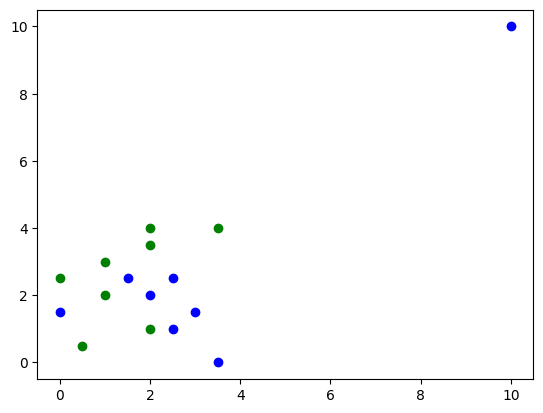

In [2]:
colors = np.array([x for x in 'bgrcmyk'])
# Separate the data points based on their class
class_0 = np.array([data["Attribute A"][i] for i in range(len(data["Class"])) if data["Class"][i] == 0])
class_1 = np.array([data["Attribute A"][i] for i in range(len(data["Class"])) if data["Class"][i] == 1])

attr_0 = np.array([data["Attribute B"][i] for i in range(len(data["Class"])) if data["Class"][i] == 0])
attr_1 = np.array([data["Attribute B"][i] for i in range(len(data["Class"])) if data["Class"][i] == 1])

# Plot the data points
plt.scatter(class_0, attr_0, color=colors[0], label="Class 0")
plt.scatter(class_1, attr_1, color=colors[1], label="Class 1")
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

（10，10，0）

In [3]:
# Calculate z-scores for each attribute
z_scores_attr_A = np.abs((data["Attribute A"] - np.mean(data["Attribute A"])) / np.std(data["Attribute A"]))
z_scores_attr_B = np.abs((data["Attribute B"] - np.mean(data["Attribute B"])) / np.std(data["Attribute B"]))

# Define a threshold for z-scores to identify outliers
z_score_threshold = 3

# Remove points with z-scores above the threshold for both attributes
cleaned_data = {
    "Attribute A": [],
    "Attribute B": [],
    "Class": []
}

for i in range(len(data["Class"])):
    if z_scores_attr_A[i] <= z_score_threshold and z_scores_attr_B[i] <= z_score_threshold:
        cleaned_data["Attribute A"].append(data["Attribute A"][i])
        cleaned_data["Attribute B"].append(data["Attribute B"][i])
        cleaned_data["Class"].append(data["Class"][i])

# Print the cleaned data
print(cleaned_data)

{'Attribute A': [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.0], 'Attribute B': [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5], 'Class': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]}


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

In [5]:
from sklearn.cluster import DBSCAN

# Convert the data to a NumPy array
X = np.array(list(zip(data["Attribute A"], data["Attribute B"])))

# Define the clustering model
dbscan = DBSCAN(eps=1.5, min_samples=2)

# Fit the model to the data
dbscan.fit(X)

# Identify the noise points
noise_points = X[dbscan.labels_ == -1]

# Remove the noise points from the dataset
cleaned_data = {
    "Attribute A": [],
    "Attribute B": [],
    "Class": []
}

for i in range(len(X)):
    if not np.array_equal(X[i], noise_points):
        cleaned_data["Attribute A"].append(X[i][0])
        cleaned_data["Attribute B"].append(X[i][1])
        cleaned_data["Class"].append(data["Class"][i])

# Print the cleaned data
print(cleaned_data)

{'Attribute A': [3.5, 0.0, 1.0, 2.5, 2.0, 1.5, 2.0, 3.5, 1.0, 3.0, 2.0, 2.0, 2.5, 0.5, 0.0, 10.0], 'Attribute B': [4.0, 1.5, 2.0, 1.0, 3.5, 2.5, 1.0, 0.0, 3.0, 1.5, 4.0, 2.0, 2.5, 0.5, 2.5, 10.0], 'Class': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]}


In [ ]:
（10，10，0）

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

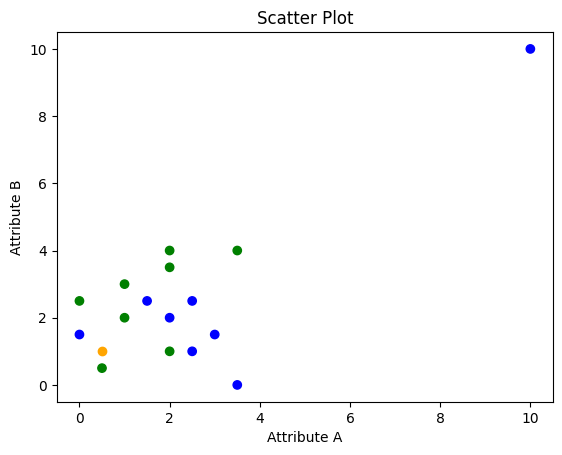

In [6]:
# Extract the data
x = data["Attribute A"]
y = data["Attribute B"]
colors = np.array([x for x in 'bgrcmyk'])

# Plot the scatter plot
plt.scatter(x, y, color=colors[data["Class"]].tolist())

# Plot the point (0.5, 1) in a different color
plt.scatter(0.5, 1, color='orange')

# Set the axis labels and title
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Scatter Plot')

# Show the plot
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

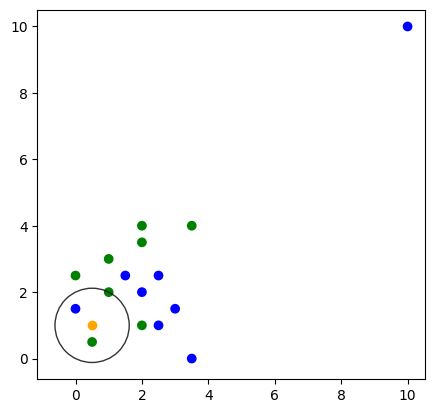

In [17]:
import math

def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def n_closest_to(example, n):
    # Extract the data
    x = data["Attribute A"]
    y = data["Attribute B"]
    
    # Compute the distances from the example point to all points in the dataset

    distances = np.sqrt((np.array(x) - example[0])**2 + (np.array(y) - example[1])**2)
    
    # Get the indices of the n closest points
    closest_indices = distances.argsort()[:n]
    
    # Return the n closest points

    return [(x[i], y[i]) for i in closest_indices], closest_indices

# Define the example point
example = (0.5, 1)

# Get the 3 closest points to the example point
closest_points,_ = n_closest_to(example, 3)

# Compute the radius of the circle
radius = max(np.sqrt((p[0]-example[0])**2 + (p[1]-example[1])**2) for p in closest_points)

# Plot the scatter plot with the circle
fig, ax = plt.subplots()
ax.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
ax.scatter(0.5, 1, color='orange')
cir = plt.Circle(example, radius, fill=False, alpha=0.8)
ax.add_patch(cir)
ax.set_aspect('equal')
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [22]:
def majority(points):
    count = {0: 0, 1: 0}  # count the number of points in each class
    for point in points:

        count[data["Class"][point]] += 1
    if count[0] > count[1]:
        return 0
    elif count[0] < count[1]:
        return 1
    else:  # tie, default to class 0
        return 0

_,closest_points_indices = n_closest_to((0.5, 1), 3)

new_point_class = majority(closest_points_indices)
print("Class assigned to new point:", new_point_class)

Class assigned to new point: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [24]:

def classify_point(point, dataset, k):
    distances = []
    for i in range(len(dataset["Class"])):
        dist = math.sqrt(
            (point["Attribute A"] - dataset["Attribute A"][i]) ** 2
            + (point["Attribute B"] - dataset["Attribute B"][i]) ** 2
        )
        distances.append((dist, dataset["Class"][i]))
    distances.sort()
    k_nearest = [distances[i][1] for i in range(k)]
    return max(set(k_nearest), key=k_nearest.count)

count = 0
for i in range(len(data["Class"])):
    actual_class = data["Class"][i]
    training_set = {"Attribute A": [], "Attribute B": [], "Class": []}
    for j in range(len(data["Class"])):
        if j != i:
            training_set["Attribute A"].append(data["Attribute A"][j])
            training_set["Attribute B"].append(data["Attribute B"][j])
            training_set["Class"].append(data["Class"][j])
    prediction = classify_point(
        {"Attribute A": data["Attribute A"][i], "Attribute B": data["Attribute B"][i]},
        training_set,
        k=3,
    )
    if prediction == actual_class:
        count += 1

accuracy = count / len(data["Class"])
print("overall accuracy =", accuracy)

overall accuracy = 0.625
